In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [85]:
x = np.random.rand(30)
y = np.random.rand(30)
data = []
for i in x:
    for j in y:
        data.append([i,j])
X = np.array(data)

In [86]:
Y = []
for i in range(X.shape[0]):
    if((X[i][0] < 0.5 and X[i][1] < 0.5) or (X[i][0] > 0.5 and X[i][1] > 0.5)):
        Y.append(0)
    else:
        Y.append(1)
Y = np.array(Y)

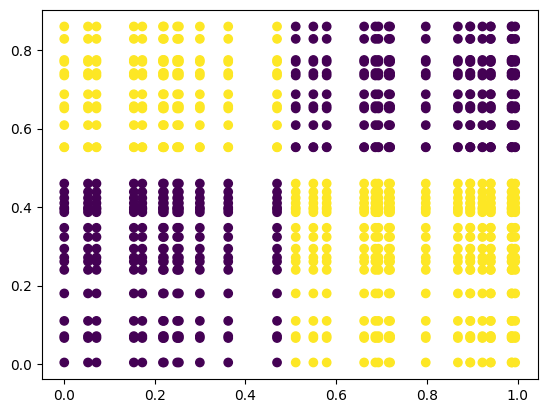

In [87]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [105]:
class XOR_NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []

        # Initialize weights and biases
        layer_sizes = [input_size] + hidden_layers + [output_size]
        for i in range(len(layer_sizes) - 1):
            W = np.random.randn(layer_sizes[i], layer_sizes[i+1])
            b = np.zeros((1, layer_sizes[i+1]))
            self.weights.append(W)
            self.biases.append(b)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.activations = []
        a = X
        self.activations.append(a)
        # Forward propagation
        for W, b in zip(self.weights, self.biases):
            z = np.dot(a, W) + b
            a = self.sigmoid(z)
            self.activations.append(a)
        return a

    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        delta = self.activations[-1] - y
        dW = np.dot(self.activations[-2].T, delta) / m
        db = np.sum(delta, axis=0, keepdims=True) / m
        self.weights[-1] -= learning_rate * dW
        self.biases[-1] -= learning_rate * db
        for i in range(2, len(self.hidden_layers) + 2):
            delta = np.dot(delta, self.weights[-i+1].T) * self.activations[-i] * (1 - self.activations[-i])
            dW = np.dot(self.activations[-i-1].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m
            self.weights[-i] -= learning_rate * dW
            self.biases[-i] -= learning_rate * db

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X_train)
            self.backward(X_train, y_train, learning_rate)

    def predict(self, X):
        return np.round(self.forward(X))

    def boundary(self):
        Y_pred = []
        row = np.linspace(0.0,1.0,50)
        col = np.linspace(0.0,1.0,50)
        grid = []
        for i in row:
            for j in col:
                grid.append([i,j])
        grid = np.array(grid)
        y = self.predict(grid)
        plt.scatter(grid[:,0],grid[:,1],c = y,s=20)
        plt.show()

In [106]:
input_size = 2
hidden_layers = [10, 10, 10, 10, 10]  # 5 hidden layers with 10 nodes each
output_size = 1
X_Train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_Train = np.array([[0], [1], [1], [0]])

In [109]:
xor_nn = XOR_NeuralNetwork(input_size, hidden_layers, output_size)
xor_nn.train(X_Train, y_Train, epochs=1000, learning_rate=0.2)
print("Predictions:", xor_nn.predict(X_Train))

Predictions: [[0.]
 [1.]
 [1.]
 [0.]]


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

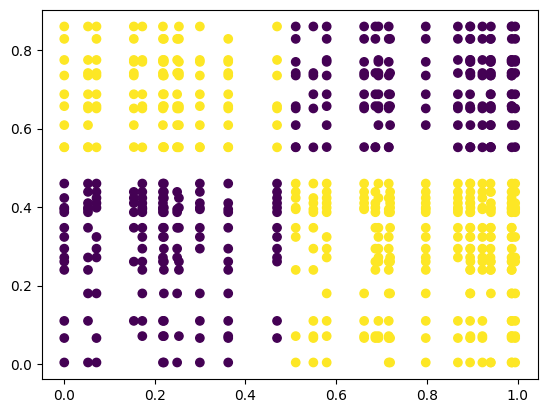

In [111]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [112]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [113]:
input = 2
hidden = [10,10,10,10]
output = 1

In [114]:
epochs = 10000
lr = 0.2
xor = XOR_NeuralNetwork(input,hidden,output)
xor.train(X_train, y_train, epochs, lr)

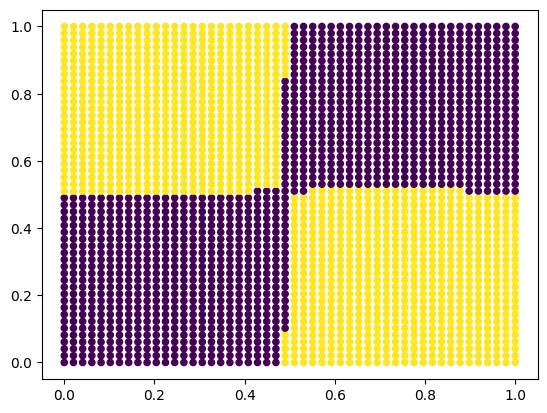

In [115]:
xor.boundary()

In [116]:
y_pred = xor.predict(X_test)

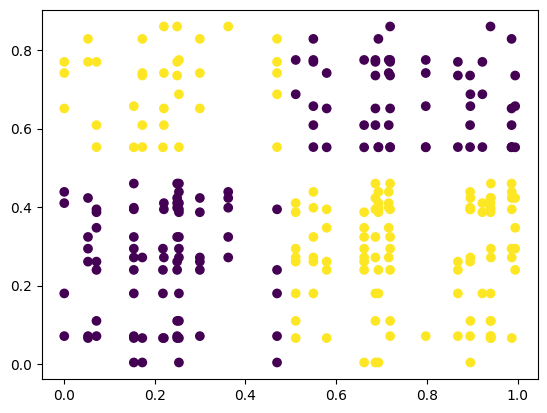

In [117]:
y = y_pred.reshape(1,y_pred.shape[0])
plt.scatter(X_test[:,0],X_test[:,1],c=y)
plt.show()

In [118]:
print(xor.weights)
print(xor.biases)

[array([[-2.62630731,  3.37691943,  2.22443914, -2.46886665,  0.50346403,
         2.64728282,  0.9326474 , -1.31155996,  5.22709589,  0.18634068],
       [ 0.61732225, -2.20697131,  1.23729167, -4.76416575, -3.21224206,
         2.75140264,  1.07491712,  3.5760957 , -0.47871737,  2.51343817]]), array([[ 4.45487494e-01, -7.07942319e-01,  1.37353938e+00,
         3.00844951e+00,  1.16655345e+00, -1.48665004e+00,
        -2.80682222e+00,  6.42100992e-01, -5.24108572e-01,
        -4.63398684e-01],
       [-9.05324237e-01,  1.16524235e+00, -1.73257404e+00,
        -2.03977415e+00,  4.75749984e-01,  7.78962165e-01,
        -7.56081747e-01, -2.37564255e+00, -8.04175944e-01,
         6.06312889e-01],
       [-1.71221829e+00, -3.25477193e-01, -5.06071916e-01,
         9.15233533e-02, -8.74727968e-02,  6.29984529e-01,
        -8.26245728e-01,  1.04095289e+00,  8.28403677e-01,
         2.01495701e+00],
       [ 3.32626026e+00, -4.58163857e-01,  1.90519770e+00,
        -1.73789673e+00,  3.8869284